In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from src.dataGenerator import DataGenerator

# Data Generation

## Parameter Setup

In [2]:
config = {
    "Nold": 500, 
    "oldTreatRate": 0.012,
    
    "Nyoung": 500,
    "youngTreatRate": 1-0.012
}
dataGenerator = DataGenerator(config)
Nold = config["Nold"]
oldTreatRate = config["oldTreatRate"]
Nyoung = config["Nyoung"]
youngTreatRate = config["youngTreatRate"]

In [3]:
# ========== local control ==========
doRandomCoefficient = False#True
# ========== local control ==========

A = 5
B = 15
C = 45
D = 95

if doRandomCoefficient:
    set1 = np.arange(1, 11) * (-1) ** np.random.randint(0, 2)
    set2 = np.arange(11, 21) * (-1) ** np.random.randint(0, 2)
    set3 = np.arange(41, 51) * (-1) ** np.random.randint(0, 2)
    set4 = np.arange(91, 101) * (-1) ** np.random.randint(0, 2)
    coefConfig = [set1, set2, set3, set4]
    random.shuffle(coefConfig)
    A = dataGenerator.getCoefficient(candidate = coefConfig[0])
    B = dataGenerator.getCoefficient(candidate = coefConfig[1])
    C = dataGenerator.getCoefficient(candidate = coefConfig[2])
    D = dataGenerator.getCoefficient(candidate = coefConfig[3])

coefficients = {
    "A": A, 
    "B": B, 
    "C": C, 
    "D": D,
}

print(coefficients)

{'A': 5, 'B': 15, 'C': 45, 'D': 95}


## Patient Data Setup

In [4]:
# Age (binary, 0 is young and 1 is old)
youngAge = dataGenerator.getAge(ageType=-1)
oldAge = dataGenerator.getAge(ageType=1)

youngAgeTag = dataGenerator.getAgeTag(ageType=-1)
oldAgeTag = dataGenerator.getAgeTag(ageType=1)

# Sex (binary, 0 is female and 1 is male)
youngSex = dataGenerator.getSex(age=youngAge)
oldSex = dataGenerator.getSex(age=oldAge)

# Treatment
youngT = dataGenerator.getTreatment(sex=youngSex, ageType=-1)
oldT = dataGenerator.getTreatment(sex=oldSex, ageType=1)

In [5]:
oldData = np.vstack((oldT, oldAge, oldAgeTag, oldSex)).T
oldData = pd.DataFrame(oldData)
oldData = oldData.rename(columns={0:'T', 1:'Age', 2:'AgeTag', 3:'Sex'})
oldData = oldData.sample(frac=1)

youngData = np.vstack((youngT, youngAge, youngAgeTag, youngSex)).T
youngData = pd.DataFrame(youngData)
youngData = youngData.rename(columns={0:'T', 1:'Age', 2:'AgeTag', 3:'Sex'})
youngData = youngData.sample(frac=1)

In [6]:
print(np.sum(oldData['T']==1))

6


In [7]:
print(oldData.describe())
print('-'*50)
print(youngData.describe())

                T         Age  AgeTag         Sex
count  500.000000  500.000000   500.0  500.000000
mean    -0.976000    0.520000     1.0    0.000000
std      0.217989    0.288733     0.0    1.001002
min     -1.000000    0.040000     1.0   -1.000000
25%     -1.000000    0.280000     1.0   -1.000000
50%     -1.000000    0.520000     1.0    0.000000
75%     -1.000000    0.760000     1.0    1.000000
max      1.000000    1.000000     1.0    1.000000
--------------------------------------------------
                T         Age  AgeTag         Sex
count  500.000000  500.000000   500.0  500.000000
mean     0.976000   -0.520000    -1.0    0.000000
std      0.217989    0.288733     0.0    1.001002
min     -1.000000   -1.000000    -1.0   -1.000000
25%      1.000000   -0.760000    -1.0   -1.000000
50%      1.000000   -0.520000    -1.0    0.000000
75%      1.000000   -0.280000    -1.0    1.000000
max      1.000000   -0.040000    -1.0    1.000000


In [8]:
noiseScale = 5

## Case 1: Apparent Imbalance
$$y = A\times Sex +$$
$$B\times T + $$
$$D\times Sex \times T$$

In [9]:
oldData['yo1'] = dataGenerator.getOutcome1(oldData, coefficients)
oldData['yo1CF'] = dataGenerator.getOutcome1(oldData, coefficients, CF=True)
oldData['y1'] = dataGenerator.addNoise(oldData['yo1'], scale=noiseScale)
oldData['y1CF'] = dataGenerator.addNoise(oldData['yo1CF'], scale=noiseScale)

youngData['yo1'] = dataGenerator.getOutcome1(youngData, coefficients)
youngData['y1'] = dataGenerator.addNoise(youngData['yo1'], scale=noiseScale)
youngData['yo1CF'] = dataGenerator.getOutcome1(youngData, coefficients, CF=True)
youngData['y1CF'] = dataGenerator.addNoise(youngData['yo1CF'], scale=noiseScale)

## Case 2: Apparent Imbalance
$$y = A\times Sex +$$
$$B\times T + $$
$$C\times Age + $$
$$D\times Age\times Sex$$

In [10]:
oldData['yo2'] = dataGenerator.getOutcome2(oldData, coefficients)
oldData['yo2CF'] = dataGenerator.getOutcome2(oldData, coefficients, CF=True)
oldData['y2'] = dataGenerator.addNoise(oldData['yo2'], scale=noiseScale)
oldData['y2CF'] = dataGenerator.addNoise(oldData['yo2CF'], scale=noiseScale)

youngData['yo2'] = dataGenerator.getOutcome2(youngData, coefficients)
youngData['y2'] = dataGenerator.addNoise(youngData['yo2'], scale=noiseScale)
youngData['yo2CF'] = dataGenerator.getOutcome2(youngData, coefficients, CF=True)
youngData['y2CF'] = dataGenerator.addNoise(youngData['yo2CF'], scale=noiseScale)

## Case 3: Genuine Imbalance
$$y = A\times Sex +$$
$$B\times T + $$
$$C\times Age + $$
$$D\times Age\times T$$

In [11]:
oldData['yo3'] = dataGenerator.getOutcome3(oldData, coefficients)
oldData['yo3CF'] = dataGenerator.getOutcome3(oldData, coefficients, CF=True)
oldData['y3'] = dataGenerator.addNoise(oldData['yo3'], scale=noiseScale)
oldData['y3CF'] = dataGenerator.addNoise(oldData['yo3CF'], scale=noiseScale)

youngData['yo3'] = dataGenerator.getOutcome3(youngData, coefficients)
youngData['y3'] = dataGenerator.addNoise(youngData['yo3'], scale=noiseScale)
youngData['yo3CF'] = dataGenerator.getOutcome3(youngData, coefficients, CF=True)
youngData['y3CF'] = dataGenerator.addNoise(youngData['yo3CF'], scale=noiseScale)

In [12]:
totalData = pd.concat([oldData, youngData], axis=0).sample(frac=1)
totalData

,T,Age,AgeTag,Sex,yo1,yo1CF,y1,y1CF,yo2,yo2CF,y2,y2CF,yo3,yo3CF,y3,y3CF
36,1.0,-0.92,-1.0,1.0,115.0,-105.0,112.040010,-108.237789,-108.8,-138.8,-104.260130,-140.967104,-108.8,36.0,-110.884371,30.903047
33,-1.0,0.48,1.0,1.0,-105.0,115.0,-106.879361,116.286714,57.2,87.2,53.461226,90.748609,-34.0,87.2,-35.642870,82.665815
373,-1.0,0.04,1.0,-1.0,75.0,-85.0,74.052244,-84.644700,-22.0,8.0,-25.346215,11.366214,-22.0,15.6,-23.603358,12.001047
400,1.0,-0.88,-1.0,-1.0,-85.0,75.0,-82.993870,87.191321,54.0,24.0,44.554073,22.917291,-113.2,24.0,-105.024805,31.829598
469,-1.0,0.48,1.0,-1.0,75.0,-85.0,73.324002,-83.807528,-44.0,-14.0,-48.902361,-14.328907,-44.0,77.2,-42.046240,80.655396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,1.0,-1.00,-1.0,1.0,115.0,-105.0,118.519213,-109.426492,-120.0,-150.0,-119.067786,-147.635503,-120.0,40.0,-123.034190,34.374009
491,1.0,-0.76,-1.0,-1.0,-85.0,75.0,-85.577661,74.330939,48.0,18.0,46.021282,20.169814,-96.4,18.0,-97.628791,11.250763
73,-1.0,0.32,1.0,1.0,-105.0,115.0,-102.230083,114.539388,34.8,64.8,35.821692,61.666962,-26.0,64.8,-26.790577,63.975273
40,-1.0,0.08,1.0,1.0,-105.0,115.0,-105.411036,114.494782,1.2,31.2,-3.440703,32.867533,-14.0,31.2,-13.550583,24.036370


## Quick View

In [25]:
# ========== local control ==========
doDraw = True
doSaveCSV = True
txtSubname = "contiAge001"
# ========== local control ==========
def countNumber(data, x, y):
    uniqueX, uniqueY = np.unique(data[x]), np.unique(data[y])
    countGrid = np.zeros((len(uniqueX), len(uniqueY)))
    for i in range(countGrid.shape[0]): # x length
        for j in range(countGrid.shape[1]): # y length
            countGrid[i, j] = np.sum(np.logical_and(data[x] == uniqueX[i], data[y] == uniqueY[j]))
    return countGrid

def drawGrid(data, x, y, title=None, figsize=(5, 5)):
    countGrid = countNumber(data, x, y)
    fig, axs = plt.subplots(1, 1, figsize=figsize)
    plt.pcolormesh(countGrid.T, cmap="autumn", edgecolors='black')
    for i in range(countGrid.shape[0]):
        for j in range(countGrid.shape[1]):
            plt.text(i+0.5, j+0.5, int(countGrid[i, j]), va="center", ha="center", size=20)
    plt.xlabel(x, fontsize=15)
    plt.ylabel(y, fontsize=15)
    if len(np.unique(data[x])) == 2:
        plt.xticks([0.5, 1.5], [str(int(x)) for x in np.unique(data[x])], fontsize=15)
        plt.yticks([0.5, 1.5], [str(int(x)) for x in np.unique(data[y])], fontsize=15)
    if title:
        plt.title(title, fontsize=15)
    plt.show()

In [26]:
if doSaveCSV:
    oldData.to_csv("data/oldData{}.csv".format(txtSubname))
    youngData.to_csv("data/youngData{}.csv".format(txtSubname))
    totalData.to_csv("data/totalData{}.csv".format(txtSubname))
    np.savetxt('data/coef.txt', np.array([A, B, C, D]))
    print("Data saved")

Data saved


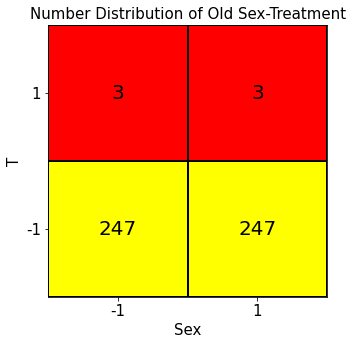

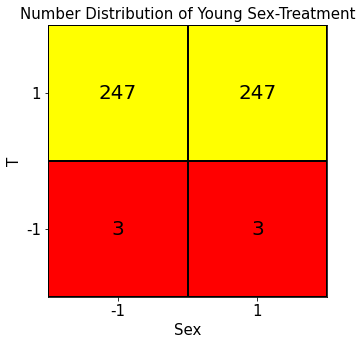

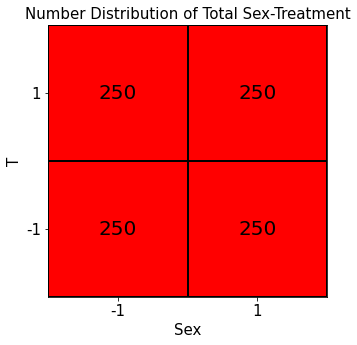

In [27]:
# ========== draw Old/Young/Overall Sex - Treatment ==========
if doDraw: 
    drawGrid(oldData, 'Sex', 'T', title="Number Distribution of Old Sex-Treatment")
    drawGrid(youngData, 'Sex', 'T', title="Number Distribution of Young Sex-Treatment")
    drawGrid(totalData, 'Sex', 'T', title="Number Distribution of Total Sex-Treatment")

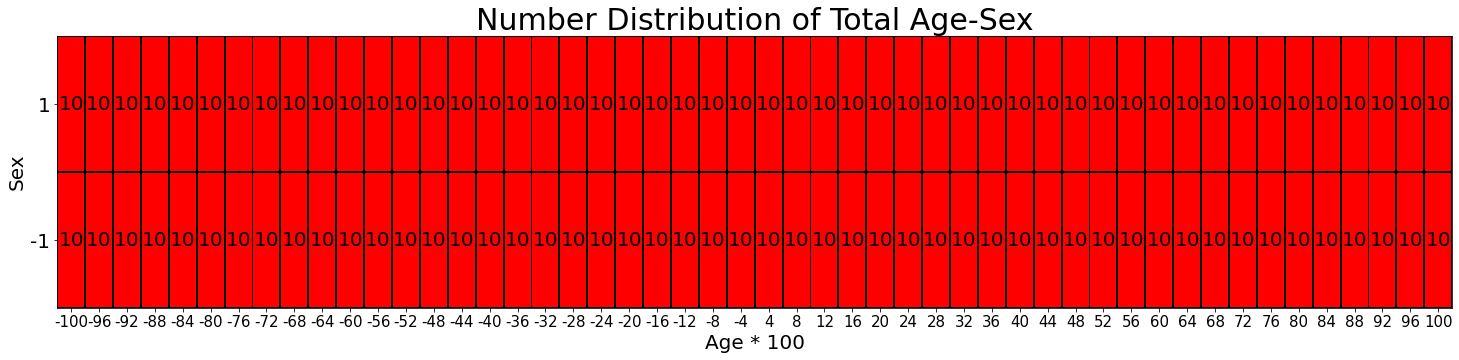

In [24]:
countGrid = countNumber(totalData, 'Age', 'Sex')
fig, axs = plt.subplots(1, 1, figsize=(25, 5))
plt.pcolormesh(countGrid.T, cmap="autumn", edgecolors='black')
for i in range(countGrid.shape[0]):
    for j in range(countGrid.shape[1]):
        plt.text(i+0.5, j+0.5, int(countGrid[i, j]), va="center", ha="center", size=20)
plt.xlabel('Age * 100', fontsize=20)
plt.ylabel('Sex', fontsize=20)
plt.xticks([x+0.5 for x in range(len(np.unique(totalData['Age'])))], [str(int(x*100)) for x in np.unique(totalData['Age'])], fontsize=15)
plt.yticks([0.5, 1.5], [str(int(x)) for x in np.unique(totalData['Sex'])], fontsize=20)
if True:
    plt.title("Number Distribution of Total Age-Sex", fontsize=30)
plt.show()

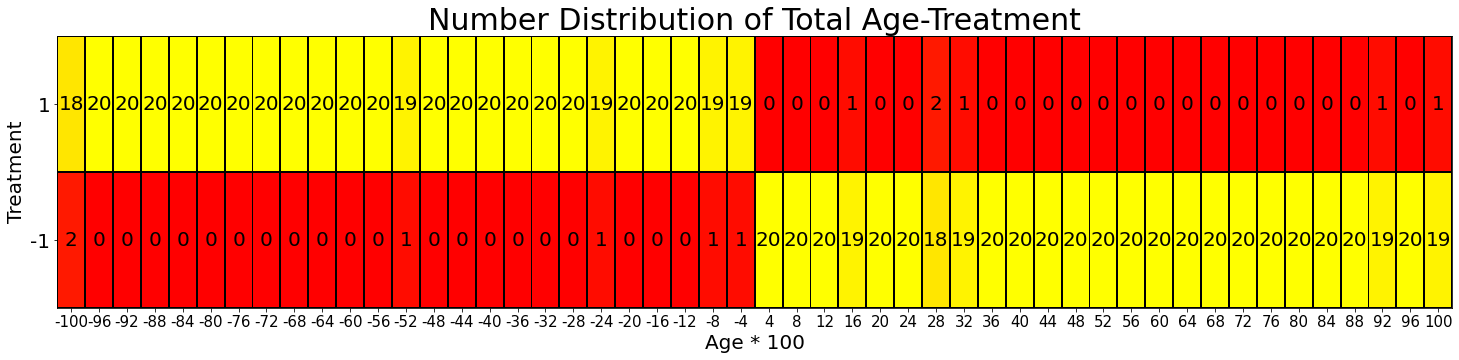

In [23]:
countGrid = countNumber(totalData, 'Age', 'T')
fig, axs = plt.subplots(1, 1, figsize=(25, 5))
plt.pcolormesh(countGrid.T, cmap="autumn", edgecolors='black')
for i in range(countGrid.shape[0]):
    for j in range(countGrid.shape[1]):
        plt.text(i+0.5, j+0.5, int(countGrid[i, j]), va="center", ha="center", size=20)
plt.xlabel('Age * 100', fontsize=20)
plt.ylabel('Treatment', fontsize=20)
plt.xticks([x+0.5 for x in range(len(np.unique(totalData['Age'])))], [str(int(x*100)) for x in np.unique(totalData['Age'])], fontsize=15)
plt.yticks([0.5, 1.5], [str(int(x)) for x in np.unique(totalData['Sex'])], fontsize=20)
if True:
    plt.title("Number Distribution of Total Age-Treatment", fontsize=30)
plt.show()

In [18]:
def drawOutcomesVersusRandom(data, yType, title):
    uniqueOutcome, countUnique = np.unique(data['yo'+yType], return_counts=True)

    fig, axs = plt.subplots(1, 1, figsize=(10, 10))
    for i in range(len(uniqueOutcome)):
        if np.sum([(data['T'] == 1) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == 1)]):
            VP = plt.violinplot(np.array(data['y'+yType][(data['T'] == 1) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == 1)]), \
                          positions=[uniqueOutcome[i]], widths=10)
            for pc in VP['bodies']:
                pc.set_facecolor('green')
                pc.set_edgecolor('green')
            for partname in ('cbars','cmins','cmaxes'):
                vp = VP[partname]
                vp.set_edgecolor('green')
                vp.set_facecolor('green')
                vp.set_linewidth(1)
            plt.text(x=uniqueOutcome[i], y=uniqueOutcome[i] + 1.1 * (np.max(data['y'+yType][data['yo'+yType] == uniqueOutcome[i]])-uniqueOutcome[i]), 
                     s=np.array(countUnique, dtype=str)[i], color='green', fontsize=15, ha='center')
        
        elif np.sum([(data['T'] == 1) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == -1)]):
            VP = plt.violinplot(np.array(data['y'+yType][(data['T'] == 1) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == -1)]), \
                          positions=[uniqueOutcome[i]], widths=10)
            for pc in VP['bodies']:
                pc.set_facecolor('green')
                pc.set_edgecolor('green')
            for partname in ('cbars','cmins','cmaxes'):
                vp = VP[partname]
                vp.set_edgecolor('green')
                vp.set_facecolor('green')
                vp.set_linewidth(1)
            plt.text(x=uniqueOutcome[i], y=uniqueOutcome[i] + 1.1 * (np.max(data['y'+yType][data['yo'+yType] == uniqueOutcome[i]])-uniqueOutcome[i]), 
                     s=np.array(countUnique, dtype=str)[i], color='green', fontsize=15, ha='center')
            
        elif np.sum([(data['T'] == -1) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == 1)]):
            VP = plt.violinplot(np.array(data['y'+yType][(data['T'] == -1) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == 1)]), \
                          positions=[uniqueOutcome[i]], widths=10)
            for pc in VP['bodies']:
                pc.set_facecolor('red')
                pc.set_edgecolor('red')
            for partname in ('cbars','cmins','cmaxes'):
                vp = VP[partname]
                vp.set_edgecolor('red')
                vp.set_facecolor('red')
                vp.set_linewidth(1)
            plt.text(x=uniqueOutcome[i], y=uniqueOutcome[i] + 1.1 * (np.max(data['y'+yType][data['yo'+yType] == uniqueOutcome[i]])-uniqueOutcome[i]), 
                     s=np.array(countUnique, dtype=str)[i], color='red', fontsize=15, ha='center')
        
        elif np.sum([(data['T'] == -1) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == -1)]):
            VP = plt.violinplot(np.array(data['y'+yType][(data['T'] == -1) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == -1)]), \
                          positions=[uniqueOutcome[i]], widths=10)
            for pc in VP['bodies']:
                pc.set_facecolor('red')
                pc.set_edgecolor('red')
            for partname in ('cbars','cmins','cmaxes'):
                vp = VP[partname]
                vp.set_edgecolor('red')
                vp.set_facecolor('red')
                vp.set_linewidth(1)
            plt.text(x=uniqueOutcome[i], y=uniqueOutcome[i] + 1.1 * (np.max(data['y'+yType][data['yo'+yType] == uniqueOutcome[i]])-uniqueOutcome[i]), 
                     s=np.array(countUnique, dtype=str)[i], color='red', fontsize=15, ha='center')

    plt.scatter(data['yo'+yType], data['yo'+yType], color='black', zorder=3)
    plt.scatter(data['yo'+yType], data['yo'+yType+'CF'], color='black', zorder=3, marker='x')
    plt.xlabel('Without Noise', fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel('With Noise', fontsize=15)
    plt.yticks(fontsize=15)
    #plt.ylim(np.min(uniqueOutcome)-(np.max(uniqueOutcome)-np.min(uniqueOutcome))*0.2, np.max(uniqueOutcome)+(np.max(uniqueOutcome)-np.min(uniqueOutcome))*0.2)
    #plt.xlim(np.min(uniqueOutcome)-(np.max(uniqueOutcome)-np.min(uniqueOutcome))*0.2, np.max(uniqueOutcome)+(np.max(uniqueOutcome)-np.min(uniqueOutcome))*0.2)
    if title:
        plt.title("Noise Effect | Case {} | {}".format(yType, title), fontsize=20)
    plt.show()

In [30]:
def drawOutcomes(data, yType):
    yClass = 'y{}'.format(yType)
    fig, axs = plt.subplots(1, 1, figsize=(10, 10))
    # treat & male
    condition = np.logical_and(data['T']==1, data['Sex']==1)
    plt.scatter(data['Age'][condition], data[yClass][condition], color='blue')
    # treat & female
    condition = np.logical_and(data['T']==1, data['Sex']==-1)
    plt.scatter(data['Age'][condition], data[yClass][condition], color='red')
    # untreat & male
    condition = np.logical_and(data['T']==-1, data['Sex']==1)
    plt.scatter(data['Age'][condition], data[yClass][condition], color='blue', marker='x')
    # untreat & female
    condition = np.logical_and(data['T']==-1, data['Sex']==-1)
    plt.scatter(data['Age'][condition], data[yClass][condition], color='red', marker='x')
    
    xAmplitude = (np.max(data['Age']) - np.min(data['Age']))/2
    plt.xlim(np.min(data['Age'])-(xAmplitude)*0.1, np.max(data['Age'])+(xAmplitude)*0.1)
    yAmplitude = (np.max(data[yClass]) - np.min(data[yClass]))/2
    plt.ylim(np.min(data[yClass])-(yAmplitude)*0.1, np.max(data[yClass])+(yAmplitude)*0.1)
    
    plt.xlabel('Age', fontsize=20)
    plt.xticks(fontsize=20)
    plt.ylabel('Outcome', fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

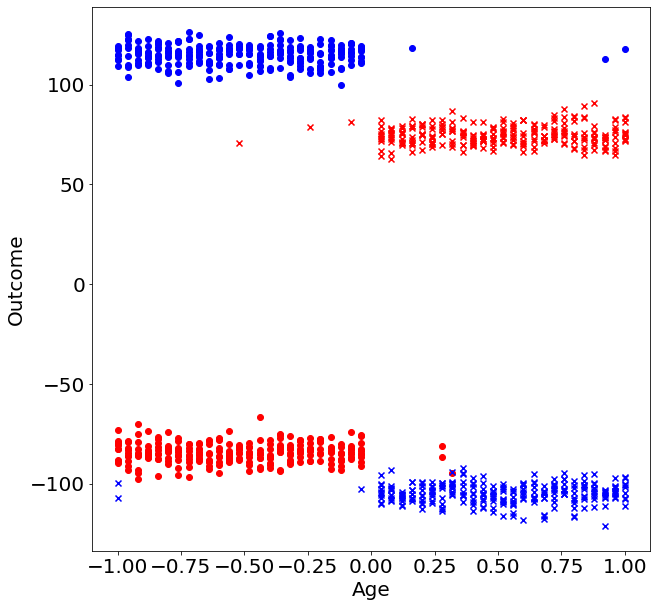

In [31]:
# ========== draw noise effect on origin  y==========
if doDraw:
    yType = '1'
    #drawOutcomesVersusRandom(oldData, yType=yType, title='Old')
    #drawOutcomesVersusRandom(youngData, yType=yType, title='Young')
    #drawOutcomesVersusRandom(totalData, yType=yType, title='Total')
    drawOutcomes(totalData, yType=yType)
    

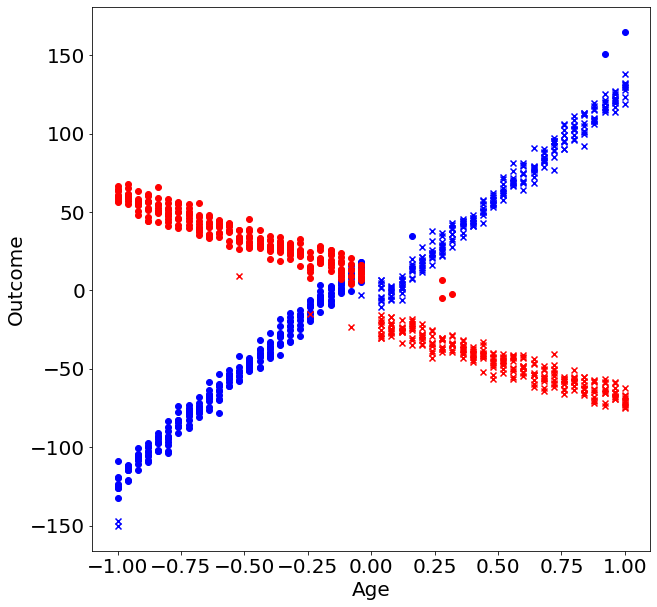

In [32]:
# ========== draw noise effect on origin  y==========
if doDraw:
    yType = '2'
    #drawOutcomesVersusRandom(oldData, yType=yType, title='Old')
    #drawOutcomesVersusRandom(youngData, yType=yType, title='Young')
    #drawOutcomesVersusRandom(totalData, yType=yType, title='Total')
    drawOutcomes(totalData, yType=yType)

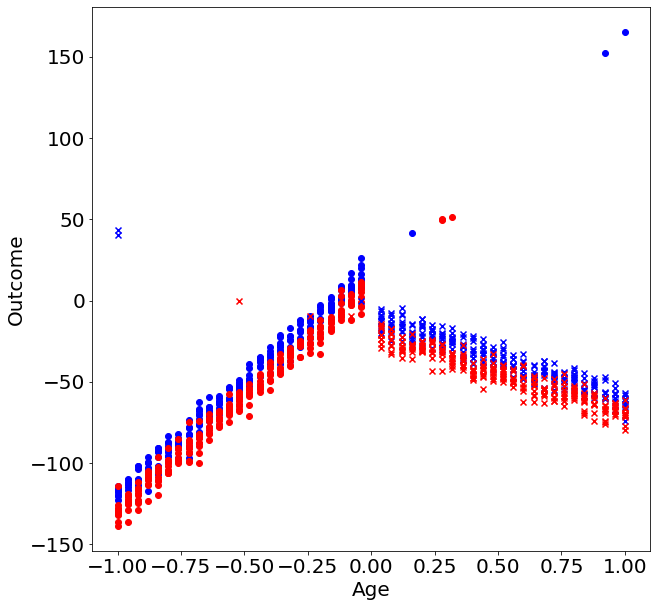

In [33]:
# ========== draw noise effect on origin  y==========
if doDraw:
    yType = '3'
    #drawOutcomesVersusRandom(oldData, yType=yType, title='Old')
    #drawOutcomesVersusRandom(youngData, yType=yType, title='Young')
    #drawOutcomesVersusRandom(totalData, yType=yType, title='Total')
    drawOutcomes(totalData, yType=yType)